In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Task 1: Merge 12 months of sales into a single file

In [2]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_list = []

for m in months:
    sales_list.append(pd.read_csv('Sales_' + m + '_2019.csv'))

sales = pd.concat(sales_list, keys=months)
#sales

## Data Augmentation

#### Task 2: Add a Month column

In [3]:
if not 'Month' in sales.columns:
    sales.insert(4, 'Month', 0)

for m,i in zip(months, range(1,13)):
    sales.loc[m, 'Month'] = i

#sales

## Data Cleaning

#### Task 3: Find NaN rows

In [4]:
#sales_null = sales[sales.isnull().any(axis=1)]

sales = sales.dropna()
#sales.loc['April'].head()

#### Task 4: Convert values of 'Price Each' and 'Quantity Ordered' to numerical

In [5]:
#sales_invalid_price = sales['Price Each'].apply(lambda x: not isinstance(x,(int,float)))
#sales_invalid_price.head()

sales = sales.loc[sales['Price Each'] != 'Price Each'] # clean up
sales['Price Each'] = sales['Price Each'].astype(float) # could have used pd.to_numeric(sales['Price Each'])
sales['Quantity Ordered'] = sales['Quantity Ordered'].astype(int)
#sales.head()

#### Task 5: Add a 'Order Total' column

In [6]:
if not 'Order Total' in sales.columns:
    sales.insert(4, 'Order Total', 0)

sales['Order Total'] = sales['Quantity Ordered'] * sales['Price Each']
#sales.head()

### Question 1: What was the best month for sales? How much was earned that month?

In [7]:
month_sales = sales.groupby('Month').sum()
month_sales = month_sales.drop(['Quantity Ordered', 'Price Each'], axis=1)
month_sales['Total Rounded'] = round(month_sales['Order Total']/1000000, 2)
month_sales['$ (millions)'] = '$ ' + (month_sales['Order Total']/1000000).round(2).astype(str) + ' M'

month_sales.head(12)

,Order Total,Total Rounded,$ (millions)
Month,,,
1,1.815335e+06,1.82,$ 1.82 M
2,2.203481e+06,2.20,$ 2.2 M
3,2.809063e+06,2.81,$ 2.81 M
4,3.396059e+06,3.40,$ 3.4 M
5,3.144585e+06,3.14,$ 3.14 M
6,2.578293e+06,2.58,$ 2.58 M
7,2.646900e+06,2.65,$ 2.65 M
8,2.244412e+06,2.24,$ 2.24 M
9,2.098817e+06,2.10,$ 2.1 M


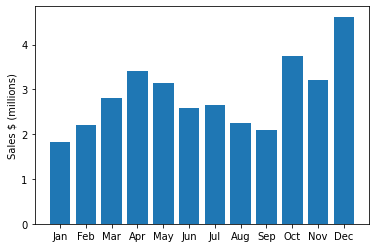

In [8]:
plt.bar([s[:3] for s in months], month_sales['Total Rounded'])
plt.ylabel('Sales $ (millions)')
plt.show()

#### Task 6: Add a 'City' column

In [9]:
sales['City'] = sales['Purchase Address'].apply(lambda s: s.split(', ')[1])
#sales.head()

#### Task 7: Add a 'State' column

In [10]:
def get_state(s):
    return s.split(', ')[2][:2]

sales['State'] = sales['Purchase Address'].apply(get_state)
#sales.head()

#### Task 8: Unify City and State

In [11]:
sales['City'] = sales['City'] + ' ' + sales['State']
sales = sales.drop(['State'], axis=1)
#sales.head()

### Question 2: What city had the highest number of sales?

In [12]:
city_sales = sales.groupby('City').sum()
city_sales = city_sales.drop(['Quantity Ordered', 'Price Each', 'Month'], axis=1)
city_sales['Total Rounded'] = round(city_sales['Order Total']/1000000, 2)
city_sales['$ (millions)'] = '$ ' + (city_sales['Order Total']/1000000).round(2).astype(str) + ' M'

city_sales.head(9)

,Order Total,Total Rounded,$ (millions)
City,,,
Atlanta GA,2.795499e+06,2.80,$ 2.8 M
Austin TX,1.819582e+06,1.82,$ 1.82 M
Boston MA,3.661642e+06,3.66,$ 3.66 M
Dallas TX,2.767975e+06,2.77,$ 2.77 M
Los Angeles CA,5.452571e+06,5.45,$ 5.45 M
New York City NY,4.664317e+06,4.66,$ 4.66 M
Portland ME,4.497583e+05,0.45,$ 0.45 M
Portland OR,1.870732e+06,1.87,$ 1.87 M
San Francisco CA,8.262204e+06,8.26,$ 8.26 M


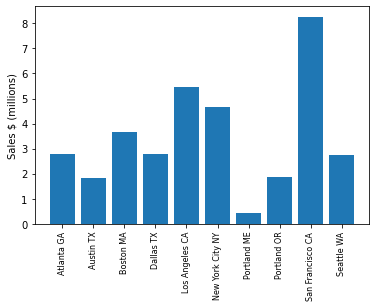

In [13]:
cities = sorted(sales['City'].unique())

plt.bar(cities, city_sales['Total Rounded'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales $ (millions)')
plt.show()

#### Task 9: Convert 'Order Date' to datetime objects

In [14]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

#### Task 10: Add Hour and Minute columns

In [23]:
if not 'Hour' in sales.columns:
    sales.insert(7, 'Hour', 0)

if not 'Minute' in sales.columns:
    sales.insert(8, 'Minute', 0)

sales['Hour'] = sales['Order Date'].dt.hour
sales['Minute'] = sales['Order Date'].dt.minute
#sales.head()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

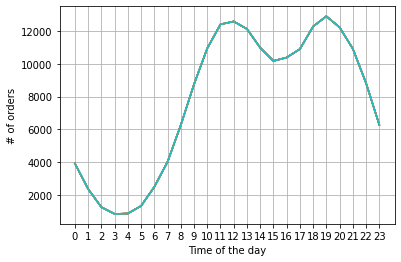

In [28]:
hours = [h for h,df in sales.groupby('Hour')]

plt.plot(hours, sales.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Time of the day')
plt.ylabel('# of orders')
plt.grid()
plt.show()

#### A: My recommendation is around 11 and 18, right before the top # of sales

In [30]:
sales.head(50)

Order ID                     Product  Quantity Ordered  Price Each  \
January 0    141234                      iPhone                 1      700.00   
        1    141235    Lightning Charging Cable                 1       14.95   
        2    141236            Wired Headphones                 2       11.99   
        3    141237            27in FHD Monitor                 1      149.99   
        4    141238            Wired Headphones                 1       11.99   
        5    141239      AAA Batteries (4-pack)                 1        2.99   
        6    141240      27in 4K Gaming Monitor                 1      389.99   
        7    141241        USB-C Charging Cable                 1       11.95   
        8    141242  Bose SoundSport Headphones                 1       99.99   
        9    141243    Apple Airpods Headphones                 1      150.00   
        10   141244    Apple Airpods Headphones                 1      150.00   
        11   141245          Macbook Pro Laptop                 1     1700.00   
        12   141246      AAA Batteries (4-pack)                 3        2.99   
        13   141247            27in FHD Monitor                 1      149.99   
        14   141248               Flatscreen TV                 1      300.00   
        15   141249            27in FHD Monitor                 1      149.99   
        16   141250             Vareebadd Phone                 1      400.00   
        17   141251    Apple Airpods Headphones                 1      150.00   
        18   141252        USB-C Charging Cable                 1       11.95   
        19   141253       AA Batteries (4-pack)                 1        3.84   
        20   141254      AAA Batteries (4-pack)                 1        2.99   
        21   141255        USB-C Charging Cable                 1       11.95   
        22   141256                Google Phone                 1      600.00   
        23   141257    Apple Airpods Headphones                 1      150.00   
        24   141258       AA Batteries (4-pack)                 1        3.84   
        25   141259      AAA Batteries (4-pack)                 2        2.99   
        26   141260      AAA Batteries (4-pack)                 1        2.99   
        27   141261        USB-C Charging Cable                 1       11.95   
        28   141262      AAA Batteries (4-pack)                 1        2.99   
        29   141263  Bose SoundSport Headphones                 1       99.99   
        30   141264    Apple Airpods Headphones                 1      150.00   
        31   141265    Apple Airpods Headphones                 1      150.00   
        32   141266      27in 4K Gaming Monitor                 1      389.99   
        33   141267    Apple Airpods Headphones                 1      150.00   
        34   141268       AA Batteries (4-pack)                 1        3.84   
        35   141269      27in 4K Gaming Monitor                 1      389.99   
        36   141270            Wired Headphones                 1       11.99   
        37   141271        USB-C Charging Cable                 1       11.95   
        38   141272      AAA Batteries (4-pack)                 1        2.99   
        39   141273            Wired Headphones                 2       11.99   
        40   141274        USB-C Charging Cable                 1       11.95   
        41   141275        USB-C Charging Cable                 1       11.95   
        42   141275            Wired Headphones                 1       11.99   
        43   141276    Lightning Charging Cable                 1       14.95   
        44   141277  Bose SoundSport Headphones                 1       99.99   
        45   141278    Lightning Charging Cable                 1       14.95   
        46   141279    Lightning Charging Cable                 1       14.95   
        47   141280      AAA Batteries (4-pack)                 1        2.99   
        48   141281    Lightning Charging 

### Question 4: What products are most often sold togheter?